In [1]:
# Librerie importate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Scaricamento dataset da Kaggle
import kagglehub

path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\mazze\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [3]:
# Alla pagina del dataset, a destra a fianco dell'anteprima del dataset
# vi è una voce "Data Explorer" che indica come è fatto quel dataset che
# si scarica. Usiamo quindi path+book.csv perchè a quel path temporanea in cui
# abbiamo scaricato il dataset, prendiamo il file books.csv che è quello con contenuto
books = pd.read_csv(f"{path}/books.csv")
books.shape

(6810, 12)

In [4]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [5]:
books.iloc[:, :3]

# "isbn": risulta che ci sono 6810 elementi distinti (confermati da analisi statistiche sui codici isbn)

,isbn13,isbn10,title
0,9780002005883,0002005883,Gilead
1,9780002261982,0002261987,Spider's Web
2,9780006163831,0006163831,The One Tree
3,9780006178736,0006178731,Rage of angels
4,9780006280897,0006280897,The Four Loves
...,...,...,...
6805,9788185300535,8185300534,I Am that
6806,9788185944609,8185944601,Secrets Of The Heart
6807,9788445074879,8445074873,Fahrenheit 451
6808,9789027712059,9027712050,The Berlin Phenomenology


In [6]:
# 1_isbn13
print(books["isbn13"].info()) #nessun valore nullo
print(books["isbn13"].nunique()) #numero univoco per ogni libro

<class 'pandas.core.series.Series'>
RangeIndex: 6810 entries, 0 to 6809
Series name: isbn13
Non-Null Count  Dtype
--------------  -----
6810 non-null   int64
dtypes: int64(1)
memory usage: 53.3 KB
None
6810


In [7]:
# 2_isbn10
print(books["isbn10"].info()) #nessun valore nullo
print(books["isbn10"].nunique()) #numero univoco per ogni libro

<class 'pandas.core.series.Series'>
RangeIndex: 6810 entries, 0 to 6809
Series name: isbn10
Non-Null Count  Dtype 
--------------  ----- 
6810 non-null   object
dtypes: object(1)
memory usage: 53.3+ KB
None
6810


In [8]:
# 3_title
print(books["title"].info()) #nessun valore nullo
print(books["title"].nunique()) #alcuni titoli ripetuti

<class 'pandas.core.series.Series'>
RangeIndex: 6810 entries, 0 to 6809
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
6810 non-null   object
dtypes: object(1)
memory usage: 53.3+ KB
None
6398


In [9]:
books.iloc[:, 3:6]

# Si nota che ci sono molte osservazioni mancanti relative ai sottitoli (subtitle), non vi sono 2/3 delle osservazioni
# Questo rende la colonna inutilizzabile per scopi di progetto, dobbiamo pensare ad un modo per renderla utile

# Guardando "categories" ci sono tanti valori univoci, bisogna trovare il modo di rendere la categorie utilizzabili

,subtitle,authors,categories
0,NaN,Marilynne Robinson,Fiction
1,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories
2,NaN,Stephen R. Donaldson,American fiction
3,NaN,Sidney Sheldon,Fiction
4,NaN,Clive Staples Lewis,Christian life
...,...,...,...
6805,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy
6806,NaN,Khalil Gibran,Mysticism
6807,NaN,Ray Bradbury,Book burning
6808,NaN,Georg Wilhelm Friedrich Hegel,History


In [10]:
books.iloc[:, 6:9]

# Ci sono alcune descrizioni mancanti, è un buon risultato ma è necessario capire come risolverlo

,thumbnail,description,published_year
0,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0
1,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0
2,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0
3,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0
4,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0
...,...,...,...
6805,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0
6806,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0
6807,NaN,NaN,2004.0
6808,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0


In [11]:
# 6_thumbnail
print(books["thumbnail"][1]) #sembra mostri la copertina del libro
print(books["title"][1])

http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api
Spider's Web


In [12]:
books.iloc[:, 9:]

,average_rating,num_pages,ratings_count
0,3.85,247.0,361.0
1,3.83,241.0,5164.0
2,3.97,479.0,172.0
3,3.93,512.0,29532.0
4,4.15,170.0,33684.0
...,...,...,...
6805,4.51,531.0,104.0
6806,4.08,74.0,324.0
6807,3.98,186.0,5733.0
6808,0.00,210.0,0.0


In [13]:
# 9_average_rating
print(books["average_rating"].describe())
print(books[books["average_rating"] == 0]["title"])

count    6767.000000
mean        3.933284
std         0.331352
min         0.000000
25%         3.770000
50%         3.960000
75%         4.130000
max         5.000000
Name: average_rating, dtype: float64
1635                     The Fantastic Vampire
1750                The Road to War, 1933-1939
4088                          American writers
4479                                    Juiced
5213        Random House Crossword Megaomnibus
6071                        Laguna, I Love You
6668                               Open City 6
6739                           How to Meditate
6788    Enzyme-Catalyzed Synthesis of Polymers
6808                  The Berlin Phenomenology
Name: title, dtype: object


In [14]:
# 11_ratings_count
print(books[books["ratings_count"] == 0]["average_rating"])

522     3.42
1359    4.50
1635    0.00
1737    4.17
1750    0.00
2690    4.06
3223    3.20
3577    4.50
4088    0.00
4252    4.33
4284    5.00
4306    5.00
4479    0.00
4518    3.75
4543    4.06
5213    0.00
5340    3.50
5497    3.83
5835    2.00
6071    0.00
6503    4.22
6618    3.90
6668    0.00
6739    0.00
6788    0.00
6802    2.93
6808    0.00
Name: average_rating, dtype: float64


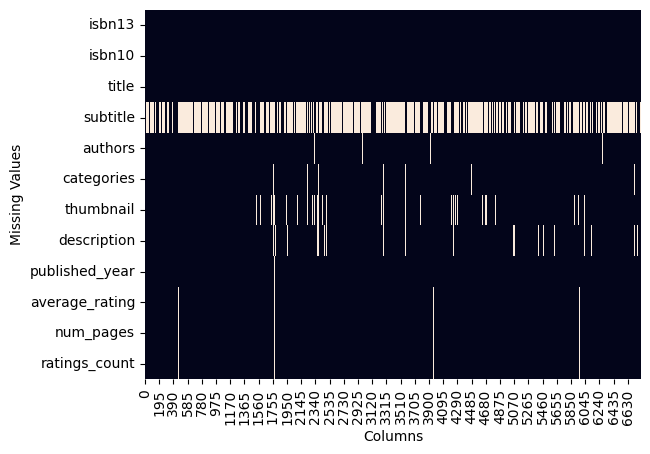

In [15]:
# Necessario capire come trattare i dati mancanti, se ci sono dei bias in questi valori NaN per le diverse features
# Creiamo quindi una heatmap dei valori mancanti per comprendere meglio la natura di questi elementi

ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show() 

# Le linee bianche sono gli elementi mancanti
# Per le feature centrali, da authors a description, i valori mancanti pargono casuali
# Per le 3 feature finali c'è un pattern ripetuto, ovvero che per un campione in cui manca una di queste,
# manca anche delle restanti due
# Possiamo concludere che probabilmente questi dati provengono da un altro dataset e il precedente dataset non contiene
# tutte le informazioni richieste nel nuovo dataset 
# Questo potrebbe essere considerato un bias: potrebbero essere relativi a libri più recenti, che hanno caratteristiche 
# diverse, o che sono stati recensiti ottimi o peggiori, o altro

In [16]:
# Studiamo quindi quei libri la cui descrizione è mancante, ed è necessaria come operazione perchè è dalle descrizioni
# che permetteremo al modello di NLP di essere performante

# Creiamo una feature che indichi con 1 i libri la cui descrizione non è presente
books["missing_description"] = np.where(books["description"].isna(), 1, 0)

# Creiamo una feature che indichi l'eta del libro, considerando l'anno di pubblicazione
books["age_of_book"] = 2025 - books["published_year"]

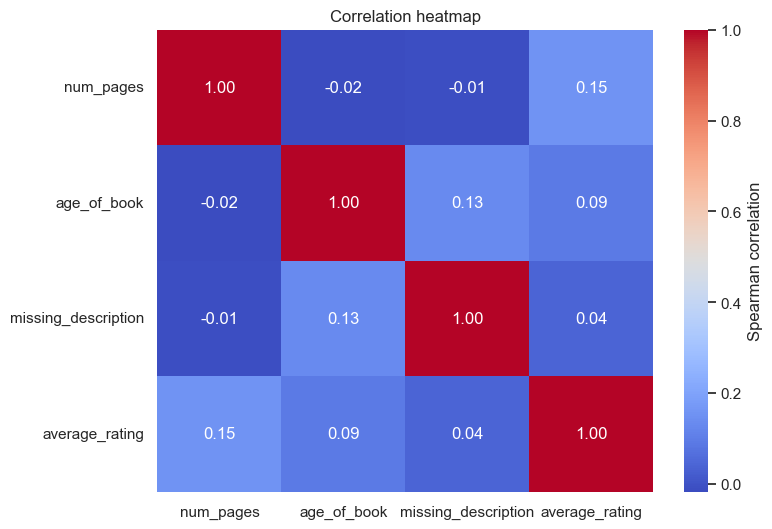

In [17]:
# Si cerca di trovare relazioni tra descrizioni mancanti e informazioni relative al libro
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman") # variazione rispetto a Pearson
# Pearson Correlation è più adatta quando si hanno a disposizione solo variabili continue 
# Dato che la colonna "missing_description" è binaria, è più adatto usare la Spearman Correlation Coefficient

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [18]:
# Studiando la mappa delle correlazioni, ci concentriamo sulla riga relativa a missing_description
# Dovremo comprendere il significato di alte o basse correlazioni con altre feature
# Scoprendo qualcosa, ad esempio che i libri che mancano di descrizione sono anche corti, o lunghi in numero di pagine...
# Sicuramente scoprendolo sapremo di inserire anche un bias nel raccomandare libri, che secondo questo esempio sarebbero
# più lunghi o più corti

# Guardando però i valori per la riga di missing_description, non sono poi così forti, ciò che è vicino a 1 o -1 
# rappresenta un legame molto forte tra feature. Ciò che è vicino a 0 indica una bassa correlazione, non rappresentando
# una vera relazione (relationship)

# La tabella è anche una prova che si abbia una buona rappresentazione di libri: libri più recenti o meno recenti, che siano
# più lunghi o più corti, che siano anche piaciuti o meno piaciuti
# Questo lo si può dire dal fatto che, appunto, in quella riga ma anche in tutta la tabella non ci siano forte correlazioni

In [19]:
# Si è ora di fronte ad una scelta: potremmo riempire i valori mancanti in description, ma d'altra parte richiederebbe
# molto web scraping. In questo caso, si decide di eliminare i campioni a cui corrispondono questi elementi nulli, anche
# per il fatto che si è notato non esserci qualche pattern specifico negli elementi mancanti (visto nella correlation_matrix
# sopra) e gli elementi che mancano rispetto al totale sono trascurabili

books[
    (books["description"].isna()) |
    (books["num_pages"].isna()) |
    (books["average_rating"].isna()) |
    (books["published_year"].isna())
]

# 303 elementi hanno uno o più features interessanti con valori mancanti
# rappresenta meno del 5% del dataset completo

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [20]:
# Creiamo quindi un dataframe che parte da books rimuovendo questi elementi mancanti

books_missing = books[
    ~(books["description"].isna()) &
    ~(books["num_pages"].isna()) &
    ~(books["average_rating"].isna()) &
    ~(books["published_year"].isna())
]

In [21]:
# Vediamo il dataset senza elementi nulli nelle categorie importanti, anche se ve ne sono ancora in altre feature
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [22]:
# Altro problema da gestire è quello che riguarda la grande quantità di categorie univoche definite per la colonna "categories"
# che individua il genere di appartenenza del romanzo corrispondente
# Ci sono categorie davvero molto specifiche, che pochi userebbero per identificare un libro
# Diamo una occhiata alla distribuzione delle categorie
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\3607260710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Count", data=category_counts, palette="viridis")


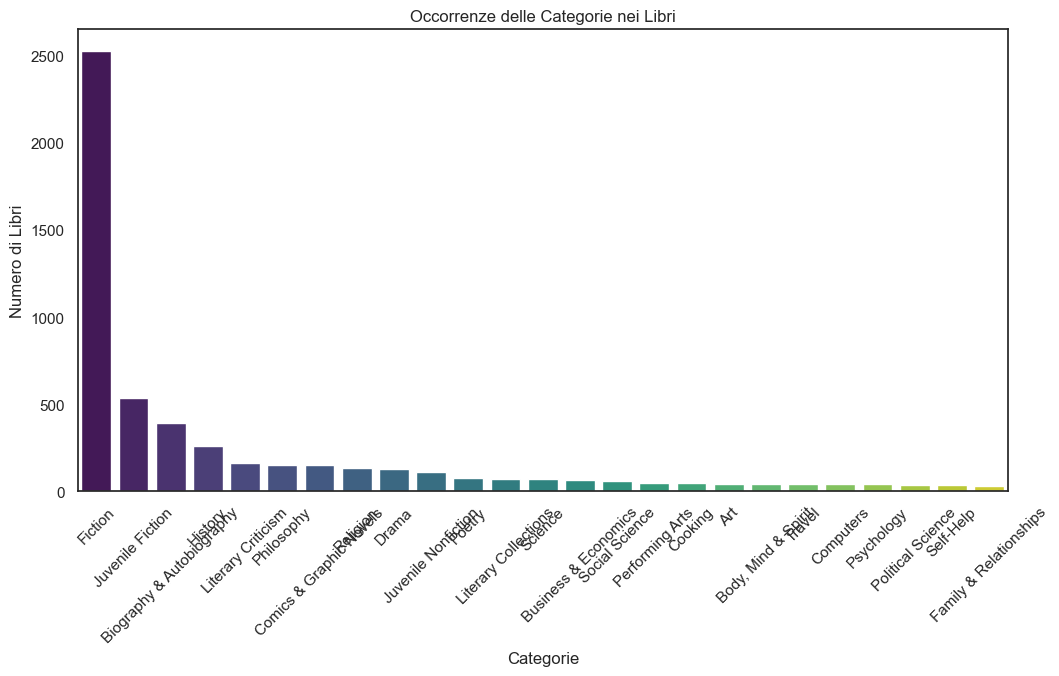

In [23]:
category_counts = books_missing["categories"].value_counts().head(25).reset_index()
category_counts.columns = ["Category", "Count"]

# Creazione del grafico a barre
plt.figure(figsize=(12,6))
sns.barplot(x="Category", y="Count", data=category_counts, palette="viridis")

# Aggiunta di titolo e etichette
plt.title("Occorrenze delle Categorie nei Libri")
plt.xlabel("Categorie")
plt.ylabel("Numero di Libri")
plt.xticks(rotation=45)

# Mostra il grafico
plt.show()

C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\1639527175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Count", data=category_counts, palette="viridis")


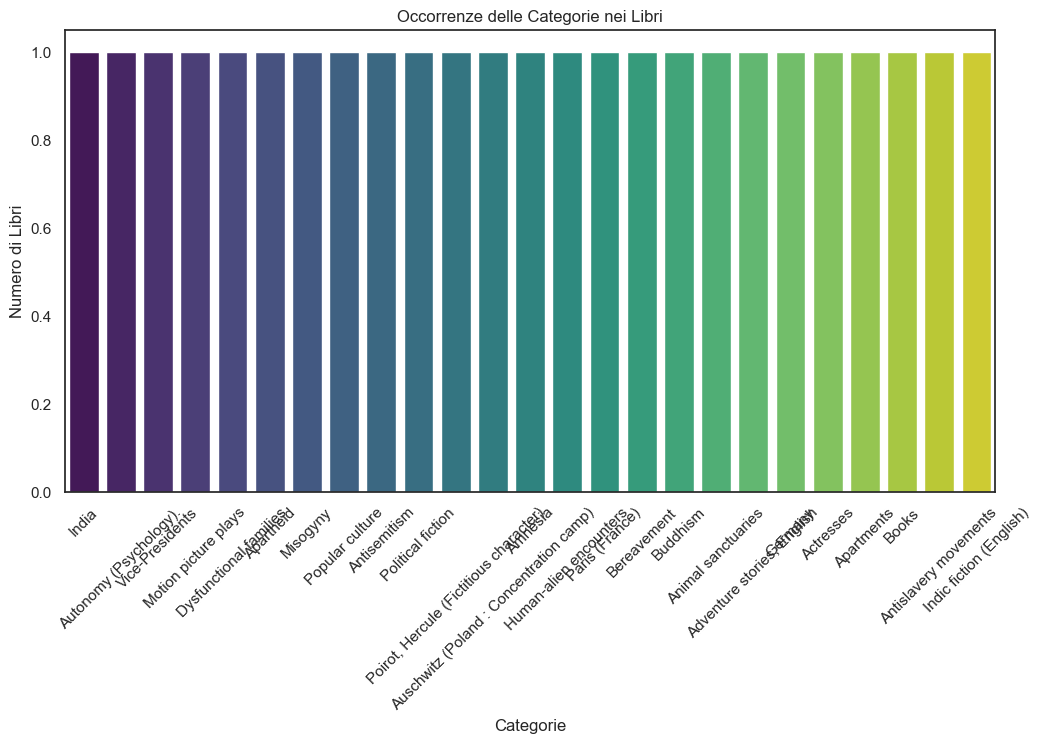

In [24]:
category_counts = books_missing["categories"].value_counts().tail(25).reset_index()
category_counts.columns = ["Category", "Count"]

# Creazione del grafico a barre
plt.figure(figsize=(12,6))
sns.barplot(x="Category", y="Count", data=category_counts, palette="viridis")

# Aggiunta di titolo e etichette
plt.title("Occorrenze delle Categorie nei Libri")
plt.xlabel("Categorie")
plt.ylabel("Numero di Libri")
plt.xticks(rotation=45)

# Mostra il grafico
plt.show()

In [25]:
# Il genere fiction è quello con maggiore occorrenza, e già dall'11° (circa) categoria incominciano ad esserci delle
# definizioni con pochissime o unitarie occorrenze
# Come riuscire a normalizzare questa feature? E' importante gestire queste categorie per la definizione di un libro
# Questa è una azione che verrà fatta utilizzando i Large Language Model e sarà un modo per introdurre la text classification

# Vediamo se si riesce a ridefinire alcune descrizioni (dato che le categorie non sembrano essere utili per ora)
# E' necessario che siano significative (meaningful), che contengano informazioni su ciò che è il libro, così 
# da poterlo raccomandare agli utenti

In [26]:
# Diamo un'occhiata al dataframe
books_missing.head(10)

# Notiamo che la "description" nel libro 6 è: Donation. 
# E' una descrizione completamente inutile, e dobbiamo trovare altre descrizioni di questo tipo che non sono utili
# Un modo per identificarle è guardare la lunghezza delle description
# Se la description ha un'unica parola, sicuramente non sarà utilizzabile

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0


In [27]:
# Creiamo una nuova feature che indica la lunghezza della description, quindi indica il numero di parole per quella descrizione
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()

C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\646354672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing["words_in_description"] = books_missing["description"].str.split().str.len()


In [28]:
books_missing["words_in_description"]

0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: words_in_description, Length: 6507, dtype: int64

C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\3311918301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word Count", y="Occurrences", data=word_counts, palette="viridis")


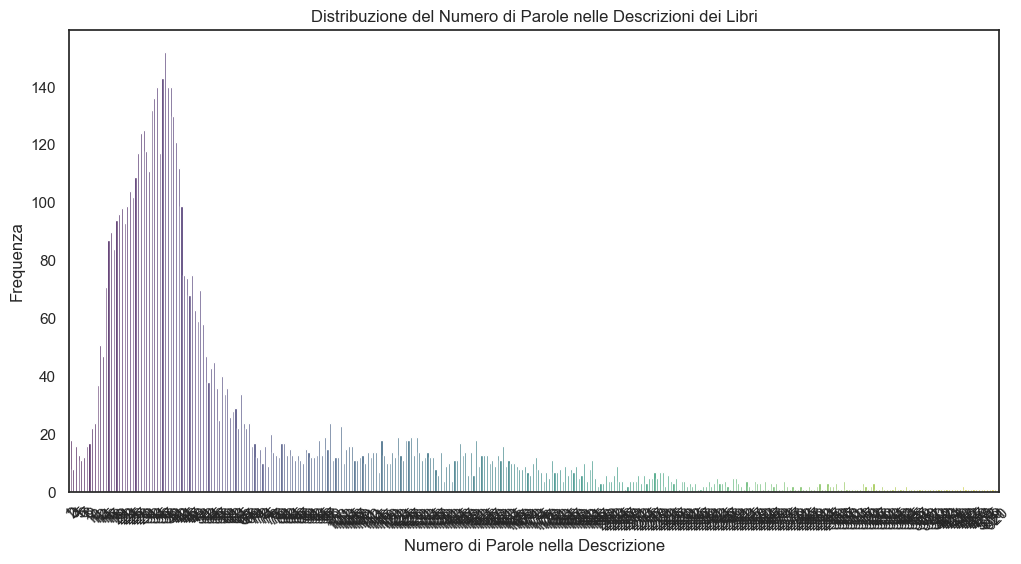

In [29]:
word_counts = books_missing["words_in_description"].value_counts().reset_index()
word_counts.columns = ["Word Count", "Occurrences"]

# Ordina i dati per numero di parole crescente
word_counts = word_counts.sort_values("Word Count")

# Creazione del grafico a barre
plt.figure(figsize=(12,6))
sns.barplot(x="Word Count", y="Occurrences", data=word_counts, palette="viridis")

# Aggiunta di titolo e etichette
plt.title("Distribuzione del Numero di Parole nelle Descrizioni dei Libri")
plt.xlabel("Numero di Parole nella Descrizione")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)

# Mostra il grafico
plt.show()

In [30]:
# Dobbiamo scegliere un breakpoint che definisca un corretta descrizione, quale sia il numero di parole che una 
# descrizione debba avere per essere definita come significativa, e utile per lo studio
# E' più a sentimento personale

# Partiamo col vedere le descrizioni che hanno un numero di parole tra 1 e 4
books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"]

# Molte di queste descrizioni non hanno nulla di interessante, possiamo quindi dire che
# descrizioni di dimensione fino a 4 non sono interessanti

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [31]:
# Vediamo allora un altro bin, che deciamo essere di dimensioni tra 5 e 14
books_missing.loc[books_missing["words_in_description"].between(5, 14), "description"]

# Anche qui non ci sono molte informazioni importanti

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [32]:
# Prossimo bin
books_missing.loc[books_missing["words_in_description"].between(15, 24), "description"]

# Più informazioni ma proviamo prossimo bin

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [33]:
books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]

# Qui si inizia ad avere descrizioni e più complete, per poter consigliare letture
# Decidiamo che con 25 si possa definire il "breakpoint" da cui considerare le descrizioni di una lunghezza accettabile

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [34]:
# Vediamo che impatto ha sul dataset scegliere come 25 il numero minimo di parole per una descrizione 
# Rifacciamo una pulizia del dataset, togliendo le descrizioni che hanno meno di 25 parole
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]

In [35]:
books_missing_25_words

# Il numero di campioni è diminuito, ma non avremmo potuto fare altrimenti, a meno di riscrivere quelle descrizioni
# 5200 libri sono comunque un buon numero da cui partire per il progetto di raccomandazione di letture

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [36]:
# Dobbiamo capire cosa fare della feature "subtitle", avendo già constatato essere una colonna inutilizzabile da sè
# dato che contiene un numero molto alto di valori nulli
# Avere dei sottolitoli può essere una convenzione di alcuni libri, come ad esempio il libro "Spider's Web" ha
# come sottotitolo "A novel", oppure "Empire of the Monsoon" ha come sottotitolo "A history of the indian ocean ..."

# Creiamo quindi una nuova feature che unisca titolo e sottotitolo quando presente
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"], books_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\3013376005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (


In [37]:
books_missing_25_words

# Vediamo quindi la colonna "title_and_subtitle" che mostra quando presente il titolo seguito dal sottotitolo

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [38]:
# Vogliamo fare un'ultima colonna che tagghi ogni descrizione con un identificatore univoco
# Verrà spiegato dopo la sua importanza nella costruzione del vettore per il database (vector database)

# Possiamo servirci dell'identificatore isbn13 perchè abbiamo già verificato essere composto da valori unici per ogni libro
# Creiamo la nuova feature in modo simile a come è stata definita la colonna "title_and_subtitle"
# Si considerano le colonne isbn13 e description e si fa un join tra queste

books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(": ".join, axis=1)

C:\Users\mazze\AppData\Local\Temp\ipykernel_3976\3198224504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(": ".join, axis=1)


In [39]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897: Lewis' work on the nature of lo...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934: ""In The Problem of Pain, C.S. L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222: On A Train Journey Home To Nort...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014: This book tells the tale of a m...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623: Wisdom to Create a Life of Pass...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535: This collection of the timeless...


In [40]:
# Guardiamo se sia possibile migliorare ancora il dataset con alcune operazioni "manuali"
# Vediamo ad esempio che ci sono alcuni libri senza autore
books_missing_25_words["authors"].isna().sum()

# Sono 32, non sono così tante. Anche se non è ottimale come operazione, si potrebbe
# pensare di sostituire i valori mancanti (più che eliminare i libri corrispondenti)
# In questo caso, togliere dal dataset questi libri non sembra necessario e permettiamo al 
# dataset di essere più completo (onde evitare problematiche future per questi valori mancanti)

32

In [41]:
# Questa è la lista di libri senza autore, a cui tramite ricerca manuale ho scritto il valore mancante

# 734: The Epic of Gilgamesh = Anonymous
# 809: A Year Down Yonder = Richard Peck
# 1862: Atonement = Ian McEwan
# 1984:	Eric Carle's Very Little Library: The very hungry caterpillar = Eric Carle
# 2053: Blow Fly = Patricia Cornwell
# 2361:	Wizard and Glass = Stephen King 
# 2376:	The Gunslinger =  Stephen King
# 2457:	The Drama of the Gifted Child = Alice Miller
# 2549:	Out of this World = J. D. Robb
# 3061:	The Sibley Field Guide to Birds of Western North America = David A. Sibley
# 3244:	The Legend of the Poinsettia = Tomie De Paola
# 3279:	Middlesex Borough = Middlesex Borough Heritage Committee
# 3286:	The Lord of the Rings = J. R. R. Tolkien
# 3575:	Irish Blessings	= Ashley Shannon
# 3711:	Astonishing X-Men - Volume 2 = Marvel Comics
# 3712:	Astonishing X-Men - Volume 3 = Marvel Comics
# 3713:	Black Widow	= Marvel Comics
# 3714:	Supreme Power = Marvel Comics
# 3715: Ultimate X-Men - Volume 14 = Marvel Comics
# 3716:	Ultimate Spider-Man = Marvel Comics
# 3718:	Ultimate Annuals = Marvel Comics
# 4002:	The Mysterious Island = Jules Verne
# 4072:	A Picture Book of Anne Frank = David A. Adler
# 4194:	King Arthur Flour Whole Grain Baking = King A. Flour
# 4277:	The Beatles' Story on Capitol Records = Bruce Spizer
# 4354:	See No Evil = Robert Baer
# 4386:	Love = Toni Morrison
# 4735:	Mangoes & Curry Leaves = Jeffrey Alford;Naomi Duguid
# 4790: Any Woman's Blues = Erika Jong
# 4791: What Do Women Want? = Erika Jong
# 4878: Museum of Terror = Junji Ito
# 5111: Carnet de Voyage = Craig Thompson

In [42]:
isbn13 = books_missing_25_words[books_missing_25_words["authors"].isna()]["isbn13"]

authors = [
    "Anonymous", "Richard Peck", "Ian McEwan", "Eric Carle", "Patricia Cornwell", "Stephen King", "Stephen King",
    "Alice Miller", "J. D. Robb", "David A. Sibley", "Tomie De Paola", "Middlesex Borough Heritage Committee", "J. R. R. Tolkien",
    "Ashley Shannon", "Marvel Comics", "Marvel Comics", "Marvel Comics", "Marvel Comics", "Marvel Comics", "Marvel Comics",
    "Marvel Comics", "Jules Verne", "David A. Adler", "King A. Flour", "Bruce Spizer", "Robert Baer", "Toni Morrison",
    "Jeffrey Alford;Naomi Duguid", "Erika Jong", "Erika Jong", "Junji Ito", "Craig Thompson"
]

# Preparo il dataframe da unire al dataset iniziale
missing_authors = pd.DataFrame({
    "isbn13": isbn13,
    "authors": authors
})

# Prima di fare il merge controllo che i tipi di "isbn13" nei due elementi da unire
# siano dello stesso tipo
print(books_missing_25_words.dtypes)
print(missing_authors.dtypes)

isbn13                    int64
isbn10                   object
title                    object
subtitle                 object
authors                  object
categories               object
thumbnail                object
description              object
published_year          float64
average_rating          float64
num_pages               float64
ratings_count           float64
missing_description       int32
age_of_book             float64
words_in_description      int64
title_and_subtitle       object
tagged_description       object
dtype: object
isbn13      int64
authors    object
dtype: object


In [43]:
# Unisco i dataset in base all'isbn13
books_missing_25_words.update(missing_authors, overwrite=True)
books_missing_25_words["authors"].isna().sum()

0

In [44]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897: Lewis' work on the nature of lo...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934: ""In The Problem of Pain, C.S. L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222: On A Train Journey Home To Nort...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014: This book tells the tale of a m...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623: Wisdom to Create a Life of Pass...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535: This collection of the timeless...


In [45]:
# Vediamo se potrebbe essere altrettanto interessante utilizzare il numero di pagine, 
# per eventualmente fare una proposta sulla base di libri più o meno lunghi
np.sort(books_missing_25_words["num_pages"].unique())

# Ci sono libri che addirittura hanno 0 pagine

array([   0.,    4.,    6.,   10.,   13.,   14.,   16.,   18.,   20.,
         24.,   26.,   29.,   30.,   31.,   32.,   34.,   35.,   39.,
         40.,   43.,   46.,   48.,   49.,   51.,   52.,   54.,   55.,
         56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,   64.,
         66.,   67.,   68.,   69.,   70.,   72.,   73.,   74.,   75.,
         76.,   77.,   78.,   79.,   80.,   81.,   82.,   84.,   85.,
         86.,   88.,   89.,   90.,   91.,   92.,   93.,   94.,   95.,
         96.,   97.,   98.,   99.,  100.,  101.,  102.,  103.,  104.,
        105.,  106.,  108.,  110.,  111.,  112.,  113.,  114.,  116.,
        117.,  118.,  119.,  120.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,  129.,  130.,  131.,  132.,  133.,  134.,  135.,
        136.,  137.,  138.,  139.,  140.,  141.,  142.,  143.,  144.,
        145.,  146.,  148.,  149.,  150.,  151.,  152.,  153.,  154.,
        155.,  156.,  157.,  158.,  159.,  160.,  161.,  162.,  163.,
        164.,  165.,

In [46]:
books_missing_25_words.loc[books_missing_25_words["num_pages"].between(0, 10)]
# Non è affidabile permettere all'utente di fare una richiesta sulla lunghezza delle pagine
# E' anche un'informazione difficilmente reperibile dal web
# Anche un possibile merge con altri dataset non sarebbe controllato, in quanto anche negli altri 
# dataset ci sono casi di libri con 0 pagine, o 2 pagine (controllato fossero libri per adulti di più pagine)
# Alcuni libri per bambini poteva essere pensabile avessero poche pagine, ma solo questi

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
2186,9780380620005,0380620006,Boy Who Turned Into a TV Set,NaN,Stephen Manes,Juvenile Fiction,http://books.google.com/books/content?id=7geB7...,Although his mother warns him that if he conti...,1983.0,4.00,10.0,8.0,0,42.0,36,Boy Who Turned Into a TV Set,9780380620005: Although his mother warns him t...
2686,9780439420068,0439420067,Eat!,NaN,Roberta Grobel Intrater,Juvenile Nonfiction,http://books.google.com/books/content?id=BnQ2n...,A group of babies enjoys some favorite foods--...,2002.0,3.95,10.0,54.0,0,23.0,25,Eat!,9780439420068: A group of babies enjoys some f...
2927,9780448416731,0448416735,Nancy Drew Starter Set,The Secret of the Old Clock/The Hidden Stairca...,Carolyn Keene,Juvenile Fiction,http://books.google.com/books/content?id=G_ALA...,This specially priced starter set includes six...,1998.0,4.25,0.0,2579.0,0,27.0,39,Nancy Drew Starter Set: The Secret of the Old ...,9780448416731: This specially priced starter s...
3849,9780671519162,0671519166,Guilty as Charged,A Mystery Writers of America Anthology,Scott Turow,Fiction,http://books.google.com/books/content?id=oBqZf...,An anthology of courtroom drama and whodunit s...,1996.0,3.76,10.0,147.0,0,29.0,30,Guilty as Charged: A Mystery Writers of Americ...,9780671519162: An anthology of courtroom drama...
4878,9780786818723,0786818727,Baby Einstein: Violet's House,A Giant Touch-and-Feel Book,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=bC4HA...,"Violet, a very curious young mouse, invites ba...",2003.0,3.98,10.0,39.0,0,22.0,70,Baby Einstein: Violet's House: A Giant Touch-a...,"9780786818723: Violet, a very curious young mo..."
4879,9780786819119,0786819111,"Baby Einstein: Water, Water Everywhere",NaN,"Disney Book Group,",Juvenile Fiction,http://books.google.com/books/content?id=tuAdA...,Charming illustrations and playful rhythmic ve...,2003.0,3.70,10.0,77.0,0,22.0,40,"Baby Einstein: Water, Water Everywhere",9780786819119: Charming illustrations and play...
5007,9780804104555,0804104557,The 13th directorate,NaN,Barry Chubin,Fiction,http://books.google.com/books/content?id=JlUKN...,"Nick Delan, a U.S. secret agent, is ordered to...",1989.0,2.62,0.0,8.0,0,36.0,26,The 13th directorate,"9780804104555: Nick Delan, a U.S. secret agent..."
5820,9781402580352,1402580355,The Wizard's Apprentice,NaN,Jackie French Koller,Audiobooks,http://books.google.com/books/content?id=6NeoA...,"Princess Arnelle ""Nell"" wants to be the next I...",2003.0,3.78,4.0,1.0,0,22.0,26,The Wizard's Apprentice,"9781402580352: Princess Arnelle ""Nell"" wants t..."
5920,9781419317262,1419317261,The Curious Incident of the Dog in the Night-time,A Novel,Mark Haddon,Autism,NaN,Despite his overwhelming fear of interacting w...,2003.0,3.87,6.0,589.0,0,22.0,30,The Curious Incident of the Dog in the Night-t...,9781419317262: Despite his overwhelming fear o...


In [47]:
# Tramite l'analisi della feature "isbn13" è stato verificato che non ci siano righe ripetute
# Tuttavia, alcuni titoli (titolo+sottotitolo) dei libri invece si ripetono
# Controlliamo che non si trattino di libri diversi ma omonimi: nel caso in cui non si 
# verificasse questo caso, cerchiamo di fare pulizia nel dataset
books_missing_25_words.duplicated().sum()

0

In [48]:
# Definisco un sottoinsieme del dataset iniziale dei libri con titolo ripetuto
# Scorro i testi che hanno lo stesso titolo servendomi del costrutto .loc[] e 
# analizzo uno ad uno i testi per capire quali nel caso eliminare, modificare i titoli 
# o lasciare immutati, nel caso in cui si tratti di libri di autori diversi ma con stesso titolo

# Creo "duplicates" basandomi sulla feature "title_and_subtitle" perchè è quello a cui facciamo
# riferimento come libri (non solo tramite "title")
duplicates = books_missing_25_words[books_missing_25_words.duplicated(subset=["title_and_subtitle"])]

duplicates["title_and_subtitle"].shape # Ci sono quindi dei titoli ripetuti, vediamo di gestirli

(141,)

In [49]:
# Essendo le operazioni ripetute per ogni elemento di "duplicates",
# mostro solo le operazioni utilizzate ma le lascio commentate

# title = duplicates.iloc[81]["title_and_subtitle"] # Questo per ottenere uno dei titoli ripetuti, si modifica il numero (81) per vedere titoli successivi

# books_missing_25_words[books_missing_25_words["title_and_subtitle"] == title] # Guardo nel dataset i titoli ripetuti
# Servirà conoscere gli "index" da scrivere nel caso in cui si voglia eliminare il titolo, controllare se gli autori coincidono o meno,
# vedere se alcuni libri hanno informazioni su thumbnail (così da scegliere per stessi libri quelli con meno informazioni mancanti)

# Dato che le descrizioni sono lunghe, scelgo in base a quelle quale libro tenere o meno nel dataset, e per vederle
# al completo stampo le description (tante quanti sono i libri con quel "title_and_subtitle")
# print(books_missing_25_words[books_missing_25_words["title_and_subtitle"] == title]["description"].values[0])
# print(books_missing_25_words[books_missing_25_words["title_and_subtitle"] == title]["description"].values[1])
# ... # ".values[0]" e ".values[1]" nel caso in cui ci siano due titoli (per alcuni ce ne erano anche 6 distinti)

In [50]:
# Questi sono tutti i titoli che sono risultati ripetuti
# Legenda:
# "# 0": semplicemente è l'elenco di titoli che ho preso in considerazione
# "0/1,": indico l'indice del libro che intendo mantenere nel dataset. Gli altri di conseguenza sono eliminati
# (Uso così l'istruzione "books_missing_25_words[books_missing_25_words["title_and_subtitle"] == title].index" per prendere gli indici di libri da eliminare)
# Nel caso in cui i libri sono distinti, ho scritto "Sono libri distinti"
# i "!!!" indicano i titoli di libri a cui è stata effettuata una rinominazione 

# 0: 0, The Lord of the Rings OK !!!
# 1: 1, Identity: A Novel OK
# 2: sono due libri diversi, Choke OK
# 3: 0, One Hundred Years of Solitude OK
# 4: 0, One Hundred Years of Solitude OK
# 5: 1, Divina Commedia. English OK
# 6: sono libri diversi, Sammlung OK
# 7: 0, One Hundred Years of Solitude OK
# 8: 1, The Outsiders OK
# 9: 1, A Room of One's Own OK
# 10: 1, Orlando: A Biography OK
# 11: 0, Pride and Prejudice OK
# 12: 0, The Histories OK
# 13: tra 0 e 1=0, 2 altro libro, The Canterbury Tales OK !!!
# 14: 0, Faust OK
# 15: 1, Mrs Dalloway OK
# 16: 1, Dubliners OK
# 17: 1, The Oresteia OK
# 18: tra 0 e 1=0, 2 altro libro, The Canterbury Tales OK !!!
# 19: 0, The Lord of the Rings OK !!!
# 20: 0, The Silmarillion OK
# 21: 0, The Silmarillion OK
# 22: 0, Hamlet OK
# 23: tra 0 e 1=0, altri due sono libri a parte, Something Borrowed OK
# 24: 0, Invisible Cities OK
# 25: 0, Four to Score OK
# 26: 1, High Five OK
# 27: sono due libri diversi, Candy OK
# 28: sono libri diversi, Sammlung OK
# 29: sono due libri diversi, Essays OK
# 30: 1, Dragonfly in Amber OK
# 31: 0, How the Irish Saved Civilization: The Untold Story of Ireland's Heroic Role from the Fall of Rome to the Rise of Medieval Europe OK
# 32: sono libri diversi, Three Complete Novels OK
# 33: sono due libri diversi, Death Match OK
# 34: 1, Enchantress from the Stars OK
# 35: sono due libri diversi, The Rescue OK
# 36: 1, His Dark Materials OK
# 37: 0, The Amber Spyglass OK
# 38: 1, His Dark Materials OK
# 39: sono due libri diversi, Heat OK
# 40: 0, Night Shift OK
# 41: 0, The Gunslinger OK
# 42: sono due libri diversi, Thin Air OK
# 43: 0, The Hound of the Baskervilles OK
# 44: 0, Madame Bovary OK
# 45: 0, The Bluest Eye OK
# 46: 1, Life is a Dream OK
# 47: sono libri diversi, Three Complete Novels OK
# 48: sono libri diversi, Three Complete Novels OK
# 49: 0, The Complete Novels OK
# 50: sono libri diversi, Three Complete Novels OK
# 51: 0, A Midsummer Night's Dream OK
# 52: 0, Hamlet OK
# 53: 0, Beauty: A Retelling of the Story of Beauty and the Beast OK
# 54: 0, My Movie Business: A Memoir OK
# 55: 2, A Brief History of Time OK
# 56: 0, The Celestine Prophecy: An Adventure OK
# 57: 0, The Music of Chance OK
# 58: 2, A Brief History of Time OK
# 59: 0, One Hundred Years of Solitude OK
# 60: 0, The Lord of the Rings OK !!!
# 61: 0, The Lord of the Rings OK !!!
# 62: 1, The Fellowship of the Ring: Being the First Part of The Lord of the Rings OK (guardare per titolo)
# 63: 1, The Two Towers: Being the Second Part of The Lord of the Rings OK
# 64: 0, The Bluest Eye OK
# 65: 0, Gargantua and Pantagruel OK
# 66: 1, American Psycho: A Novel OK
# 67: 1, South of the Border, West of the Sun OK
# 68: 0, Theater Shoes OK
# 69: 0, Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values OK
# 70: 1, The Valkyries OK
# 71: 0, The Lord of the Rings OK !!!
# 72: 1, John Adams OK
# 73: 1, Them: Adventures with Extremists OK
# 74: 0, Cry, the Beloved Country OK
# 75: 0, The Shining OK
# 76: 0, Dracula OK
# 77: 0, A Midsummer Night's Dream OK
# 78: 1, The Merchant of Venice OK
# 79: sono due libri diversi, Underworld OK
# 80: sono due libri diversi, This Rough Magic OK
# 81: sono due libri diversi, Open House OK
# 82: 0, The Botany of Desire: A Plant's-eye View of the World OK
# 83: 1, Skeleton Crew OK
# 84: tra 0 e 1=0, altri due sono libri a parte, Something Borrowed OK
# 85: sono due libri diversi, Regeneration OK
# 86: 1, 20,000 Leagues Under the Sea OK
# 87: 1, The Handmaid's Tale OK
# 88: sono due libri diversi, Homecoming OK
# 89: sono due libri diversi, The Guardian OK
# 90: tra 0 e 1=0, altri due sono libri a parte, Something Borrowed OK
# 91: 0, Rape: A Love Story OK
# 92: 1, The Epic of Gilgamesh OK
# 93: 0, The Feynman Lectures on Physics OK
# 94: 0, The Feynman Lectures on Physics OK
# 95: 1, Anna Karenina OK
# 96: Sono due libri diversi, The Cave OK
# 97: Sono due libri diversi, Trainspotting OK !!!
# 98: 1, 20,000 Leagues Under the Sea OK
# 99: 0, Lysistrata OK
# 100: Sono due libri diversi, Phantoms OK !!!
# 101: 0, Reading Lolita in Tehran: A Memoir in Books OK
# 102: Sono due libri distinti, First Love OK !!!
# 103: 1, Under the Banner of Heaven: A Story of Violent Faith OK
# 104: 0, Haunted OK
# 105: 1, Song of Solomon OK
# 106: 0, Dead Souls OK
# 107: 0, The Hitchhiker's Guide to the Galaxy OK
# 108: 0, The Secret Garden OK
# 109: 1, A Little Princess OK
# 110: 1, Treasure Island OK
# 111: 0, The Secret Garden OK
# 112: 1, Gulliver's Travels OK
# 113: 1, The Voyage of the Jerle Shannara Trilogy OK

#... Ottenuti da una seconda analisi di "duplicates"
# (Strano ma una volta avendo eliminato i titoli precedenti, sono rimasti
# ulteriori titoli da considerare)

# 114: sono libri diversi, Fullmetal Alchemist OK
# 115: 0, Bleach OK
# 116: 1, The Picture of Dorian Gray OK
# 117: sono due libri diversi, Flowers for Algernon OK !!!
# 118: sono due libri diversi, The Art of Loving OK 
# 119: sono libri diversi, Outlander OK
# 120: 1, Murder on the Orient Express: A Hercule Poirot Mystery OK
# 121: 1, Ivanhoe OK
# 122: 0, Sense and Sensibility OK 
# 123: 0, The House of Mirth OK 
# 124: 0, Daniel Deronda OK 
# 125: 0, Swann's Way OK 
# 126: sono due libri diversi, The Oath OK
# 127: 0, Harvesting the Heart OK 
# 128: 0, The Heritage of Shannara OK 
# 129: 0, Ballet Shoes OK 
# 130: sono due libri diversi, Cuba OK
# 131: 1, The Three Musketeers OK 
# 132: 0, The Odyssey OK 
# 133: 0, Angel Fire East OK 
# 135: 0, The History of the Siege of Lisbon OK 
# 136: 1, The Iliad OK 
# 137: 1, McSweeney's OK 

In [51]:
# Questi sono i titoli (con indice indicato per selezionarli) di cui sono stati 
# modificati i titoli per scelta personale (alcuni per distinguerli da altri titoli, 
# altri per sottolineare la natura di libri di analisi, distinguendoli dalle opere originali)
books_missing_25_words.loc[58, "title_and_subtitle"] = "The Lord of the Rings: The Trilogy"
books_missing_25_words.loc[1259, "title_and_subtitle"] = "The Canterbury Tales: A Critical Analysis"
books_missing_25_words.loc[5399, "title_and_subtitle"] = "Trainspotting: A Critical Analysis"
books_missing_25_words.loc[2580, "title_and_subtitle"] = "Phantoms!"
books_missing_25_words.loc[5490, "title_and_subtitle"] = "First Love: A Gothic Tale"
books_missing_25_words.loc[6027, "title_and_subtitle"] = "Flowers for Algernon: A Critical Analysis"

In [52]:
# Vengono eliminati dal dataste i campion che non soddisfano i requisiti scelti
# I codici sono gli indici dei libri ottenuti dall'analisi precedente che sono stati scartati
# in virtù degli altri libri corretti con lo stesso titolo
books_missing_25_words = books_missing_25_words.drop([
    64, 1349, 3731, 3742, 4290, 130, 680, 734, 910, 3699, 816, 941, 899, 904, 1173, 1186, 1195, 1207, 892, 715,
    808, 1350, 1353, 1395, 3339, 1517, 1689, 1712, 1476, 2250, 2297, 1017, 2658, 2781, 2779, 2980, 3005, 3054,
    3055, 3105, 3845, 1070, 3265, 3332, 4444, 3378, 3391, 3400, 3469, 3487, 3601, 3709, 3951, 1728, 576, 4069, 
    4148, 468, 4091, 1716, 4359, 4410, 4443, 879, 4514, 2978, 1330, 5407, 2311, 4855, 885, 5058, 5059, 3209, 
    5445, 5625, 1721, 5697, 3078, 5724, 5743, 5822, 5826, 1003, 5821, 1179, 1931, 5946, 1182, 2619, 782, 6403, 
    6404, 6407, 6409, 6488, 6509, 6531, 6042, 6581, 6593, 6615, 4583, 6750, 6754, 65, 3745, 6414
])

In [53]:
# Il numero di campioni nel dataset è diminuito, circa a 5000 elementi, ma è una buona base di partenza per lo studio
books_missing_25_words

# Con l'sitruzione "books_missing_25_words[books_missing_25_words.duplicated(subset=["title_and_subtitle"])]" risultano 
# ancora duplicati i titoli che appartengono ad autori diversi ma rappresentando romanzi distinti

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883: A NOVEL THAT READERS and critic...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982: A new 'Christie for Christmas' ...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736: A memorable, mesmerizing heroin..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897: Lewis' work on the nature of lo...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934: ""In The Problem of Pain, C.S. L..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222: On A Train Journey Home To Nort...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014: This book tells the tale of a m...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623: Wisdom to Create a Life of Pass...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535: This collection of the timeless...


In [54]:
# Per fornire ulteriori informazioni, voglio accertarmi della lingua in cui sono
# presentati i libri nel dataset. Utilizzo quindi una libreria chiamata "langdetect" che
# esegua questo compito. Fornirò alla libreria le descrizioni come materia per definire la lingua del libro
from langdetect import detect, detect_langs

# Facciamo una prova: si dovrebbe ottenere come risultato la lingua "inglese"
print(detect("This is an english sentence"))

# Questo altro strumento indica la "confidence" con cui il modello identitica la lingua
print(detect_langs("Facciamo una prova, this is an english sentence"))

en
[en:0.8571402245062324, it:0.14285742389327621]


In [55]:
# Verifichiamo se i libri nel dataset siano scritti tutti in inglese
def detect_language(text):
    try:
        return detect(text)
    except:
        return "xx"

books_missing_25_words["language"] = books_missing_25_words["description"].apply(detect_language)
books_missing_25_words["language"].value_counts() # Tutti i libri sono stati etichettati con "en"

# Col fatto che non aggiunge informazioni in più al dataset, non la ritengo una feature utile
# e nella fase di definizione del dataset non la prendo in considerazione

language
en    5089
Name: count, dtype: int64

In [56]:
# E' finita la fase preparatoria del dataset (potremmo definirla di preprocessing) e siamo pronti a iniziare
# il vero e proprio lavoro di NLP
# Salviamo quindi questo dataset per poterlo utilizzare nel progetto
# Facciamo un drop delle feature di cui non abbiamo bisogno e di quelle utilizzate in fase di cleaning
# Salviamo poi come CSV

(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description", "language"], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)